# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [3]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [5]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

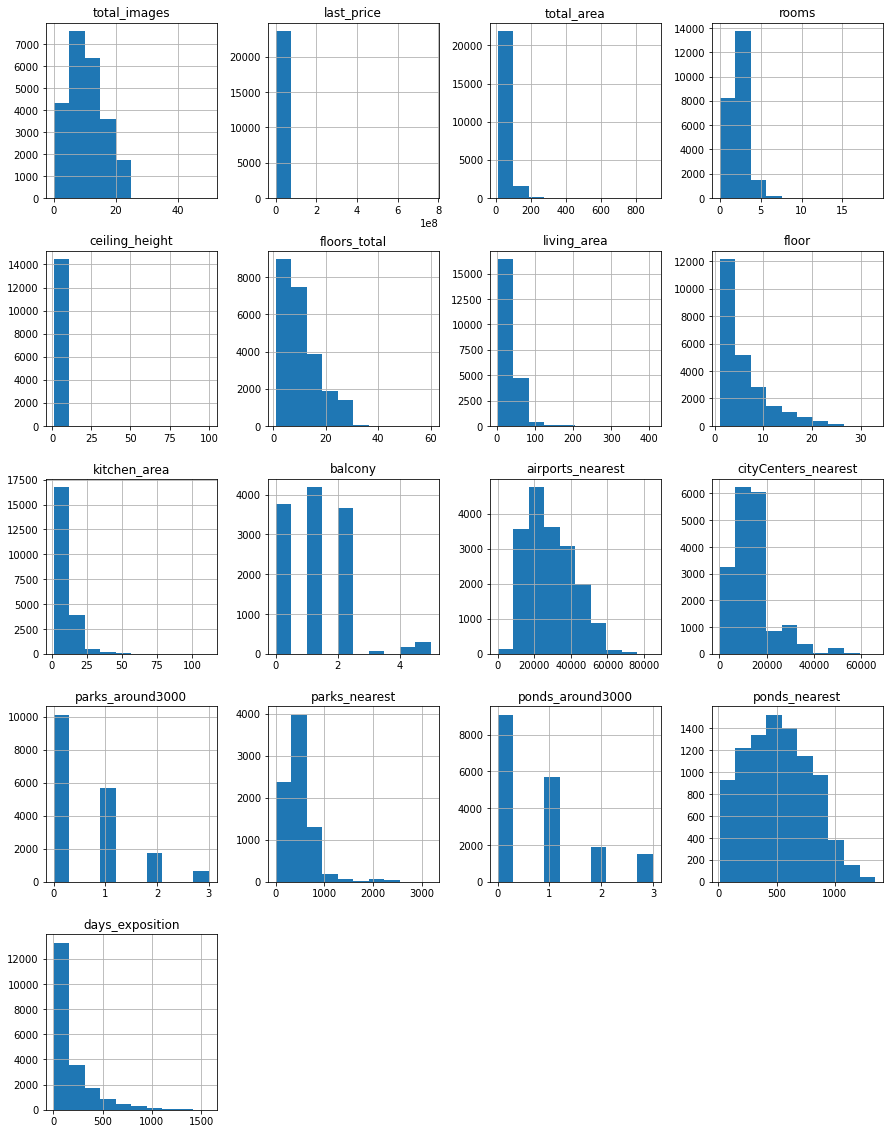

In [6]:
data.hist(figsize=(15, 20))

### Предобработка данных

In [7]:
print(data.isna().sum())
print('----------------------------')
print('Количество явных дубликатов:',data.duplicated().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64
----------------------------
Количество явных дубликатов: 0


Комментарий: строки, с пропущенными значения в столбцах **floors_total** и **locality_name**, можно удалить, таких пропусков мало.

In [8]:
data.dropna(subset=['floors_total', 'locality_name'], inplace=True)
print('Количество данных:',len(data))

Количество данных: 23565


Комментарий: Поменяем тип данных стобца **rooms** для быстроты работы на **uint8**, так как диапазон значений данного столба положительный и вряд ли превысит 255. Кроме того посмотрим количество объектов по **rooms**, чтобы понять будут ли эти данные репрезентативны. 

In [9]:
data['rooms'] = data['rooms'].astype('uint8')
data['rooms'].value_counts()
print('Количество пропусков rooms:',data['rooms'].isna().sum())

Количество пропусков rooms: 0


Комментарий: Удалим все строки, где **rooms** > 4. Таких квартир слишком мало и их параметры будет мешать определению зависимостей. 

In [10]:
print('Количество данных:',len(data),'Количество квартир с rooms > 4:',len(data.query('rooms > 4')))
data.drop(data.query('rooms > 4').index, inplace=True)
print('Количество оставшихся данных:',len(data))

Количество данных: 23565 Количество квартир с rooms > 4: 519
Количество оставшихся данных: 23046


In [11]:
data['rooms'].value_counts()

1    8004
2    7897
3    5779
4    1172
0     194
Name: rooms, dtype: int64

Комментарий: Логично, что при **rooms** == 0 должны выдаваться строки с **studio** == True, и наоборот, однако: 

In [12]:
print('Аномальные студии:', len(data.query('rooms != 0 and studio == True')) + len(data.query('rooms == 0 and studio == False')))
print('kitchen_area = NaN:', (data.query('rooms != 0 and studio == True')['kitchen_area'].isna().sum()) + 
      (data.query('rooms == 0 and studio == False')['kitchen_area'].isna().sum()))

Аномальные студии: 70
kitchen_area = NaN: 70


Комментарий: Таким образом лучше поменять, все эти 70 строк должны быть студиями с **kitchen_area** = NaN, так как во всех таблице наблюдается ошибка, что есть пропуски у студий в этом столбец, хотя должно быть 0, ведь в студии нет отдельно кухни.

In [13]:
data.loc[(data['rooms'] == 0) & (data['studio'] == False),'studio'] = True
data.loc[(data['rooms'] != 0) & (data['studio'] == True),'rooms'] = 0
print('Аномальные студии:',len(data.query('rooms != 0 and studio == True')))
print('Аномальные студии:',len(data.query('rooms == 0 and studio == False')))

Аномальные студии: 0
Аномальные студии: 0


Комментарий: апартаменты редкое явление, по моему субъективному мнению, здесь скорее всего ошибка, стоит заменить пропущенные значения на False.

In [14]:
print(data['is_apartment'].value_counts())
data['is_apartment'].fillna(False, inplace = True)
print('Количество данных:',len(data),'Количество пропусков is_apartment:',data['is_apartment'].isna().sum())

False    2652
True       48
Name: is_apartment, dtype: int64
Количество данных: 23046 Количество пропусков is_apartment: 0


<AxesSubplot:>

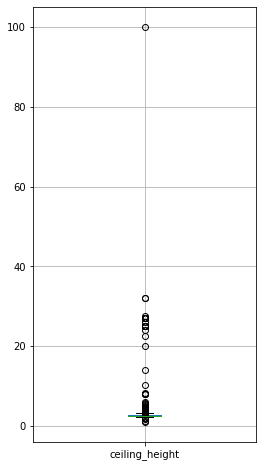

In [15]:
data.boxplot(column=['ceiling_height'], figsize=(4,8))

Комментарий: Есть выбросы, также имеются весьма низкие потолки. То, что больше 3.4 метров и меньше 2,4 метров в высоту, а также пропущенные данные, заменим медианным значением. Поскольку у нас архив объявлений о продаже квартир, надеюсь здесь нет складов и т.д. Кроме того, округлим до десятых, думаю так удобнее.

Количество данных: 23046 Количество пропусков ceiling_height: 0


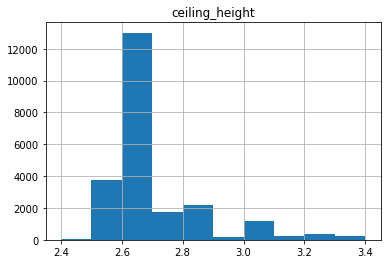

In [16]:
data['ceiling_height'] = data['ceiling_height'].round(1)
data.loc[(data['ceiling_height'] < 2.4) | (data['ceiling_height'] > 3.4), 'ceiling_height'] = data['ceiling_height'].median()
data['ceiling_height'].fillna(data['ceiling_height'].median(), inplace=True)
data.hist('ceiling_height')
print('Количество данных:',len(data),'Количество пропусков ceiling_height:',data['ceiling_height'].isna().sum())

<AxesSubplot:>

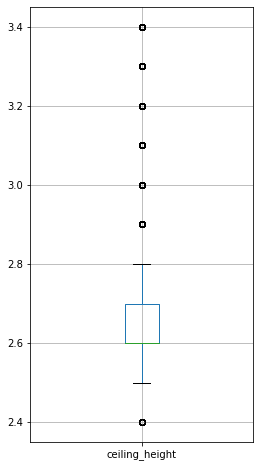

In [17]:
data.boxplot(column=['ceiling_height'], figsize=(4,8))

Комментарий: Столбцы **living_area, kitchen_area, balcony** лучше заполнять основывая на сводной таблице с группировкой по **rooms**.

<AxesSubplot:>

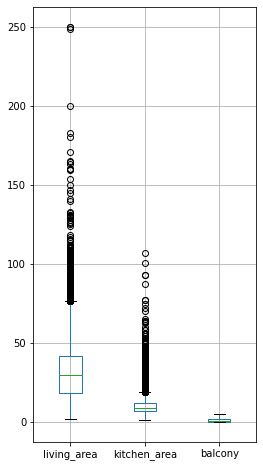

In [18]:
data.boxplot(column=['living_area','kitchen_area','balcony'], figsize=(4,8))

Комментарий: Выбросов нет только в столбце **balcony**, его можем спокойно заполнить медианным по **room**. Кроме того **balcony** можно также преобразовать в тип **uint8**

In [19]:
data['balcony'].value_counts()

1.0    4112
2.0    3635
0.0    3580
5.0     297
4.0     177
3.0      76
Name: balcony, dtype: int64

,balcony
rooms,
0,2.0
1,1.0
2,1.0
3,1.0
4,1.0


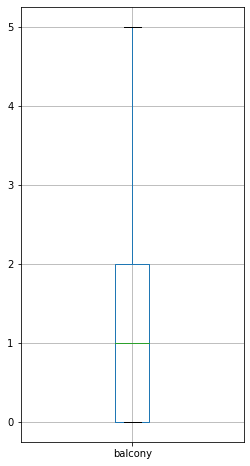

In [20]:
data.boxplot(column=['balcony'], figsize=(4,8))
data.pivot_table(index='rooms', values=['balcony'], aggfunc='median')

array([[<AxesSubplot:title={'center':'balcony'}>]], dtype=object)

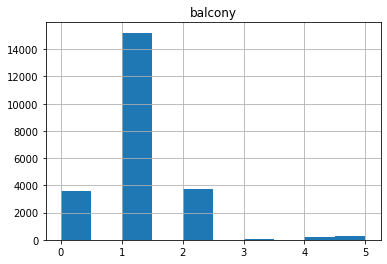

In [21]:
data['balcony'] = data['balcony'].fillna(data.groupby('rooms')['balcony'].transform('median'))
data.hist('balcony')

In [22]:
data['balcony'] = data['balcony'].astype('uint8')
print('Количество данных:',len(data),'Количество пропусков balcony', data['balcony'].isna().sum())

Количество данных: 23046 Количество пропусков balcony 0


Комментарий: Прежде чем приступить к заполнению пропусков по стобца **living_area** и **kitchen_area**, обработаем выбросы **total_area**:

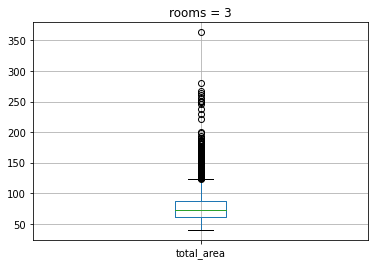

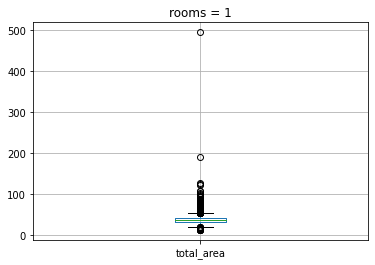

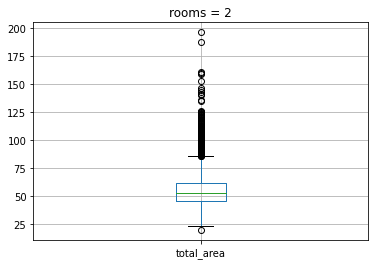

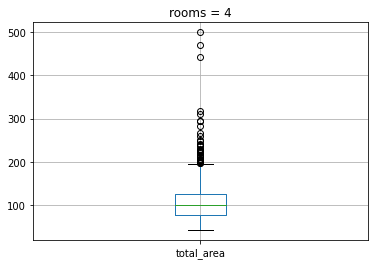

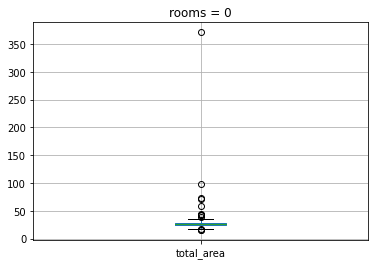

In [23]:
for room in data['rooms'].unique():
    data.query('rooms == @room').boxplot(column=['total_area'])
    plt.title('rooms = %i' %room)
    plt.show()

Комментарий: По графикам **boxplot** выше можно заметить, что выбрасы имеются по всем квартирам, значит нам необходимо будет установить вверхнюю и нижнюю границы по **rooms** для **total_area** и выбросить слишком маленькие и слишком большие квартиры из выборки.

Комментарий: Будет руководстоваться здравым смыслом и квантилями, чтобы понять какие значения **total_area** считать некоррекртными.

In [24]:
for room in range(0,5):
    print('rooms = {arg_1}, границы = ({arg_2}, {arg_3})'.
          format(arg_1 = room,
                arg_2 = data.loc[data['rooms'] == room, 'total_area'].quantile(q=0.25),
                arg_3 = data.loc[data['rooms'] == room, 'total_area'].quantile(q=0.75)))

rooms = 0, границы = (24.05, 28.5)
rooms = 1, границы = (32.5, 41.0)
rooms = 2, границы = (46.0, 62.0)
rooms = 3, границы = (62.0, 86.8)
rooms = 4, границы = (77.775, 125.325)


Комментарий: Брать границы основываясь только на квантилях из наших данных нельзя, но от них можно отталкиваться, взяв нижнюю и вверхнюю чуть меньше и больше соотвественно. Таким образом имеем следующее:

In [25]:
index_to_drop_total_area = []
index_to_drop_total_area.append(data.loc[(data['rooms'] == 0) & ((data['total_area'] > 35) | (data['total_area'] < 19))].index)
index_to_drop_total_area.append(data.loc[(data['rooms'] == 1) & ((data['total_area'] > 55) | (data['total_area'] < 25))].index)
index_to_drop_total_area.append(data.loc[(data['rooms'] == 2) & ((data['total_area'] > 80) | (data['total_area'] < 30))].index)
index_to_drop_total_area.append(data.loc[(data['rooms'] == 3) & ((data['total_area'] > 120) | (data['total_area'] < 50))].index)
index_to_drop_total_area.append(data.loc[(data['rooms'] == 4) & ((data['total_area'] > 160) | (data['total_area'] < 65))].index)

Комментарий: Удалим неподходящие строки:

In [26]:
print('Количество данных до удаления:',len(data))
for index in range(0, len(index_to_drop_total_area)):
    data.drop(index_to_drop_total_area[index], inplace=True)
print('Количество оставшихся данных',len(data))

Количество данных до удаления: 23046
Количество оставшихся данных 21709


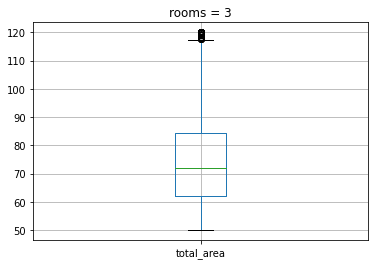

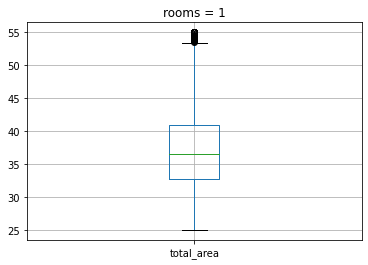

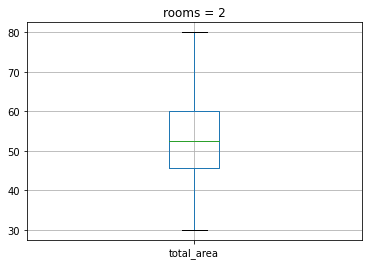

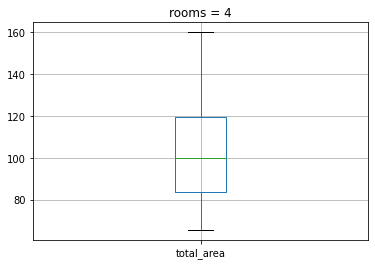

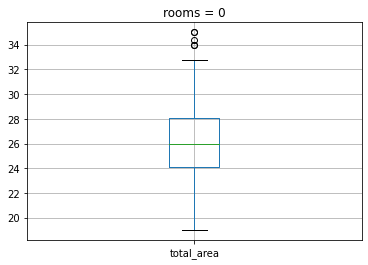

In [27]:
for room in data['rooms'].unique():
    data.query('rooms == @room').boxplot(column=['total_area'])
    plt.title('rooms = %i' %room)
    plt.show()

Комментарий: Лучше всего, на мой взгляд, заполнить пропущенные строки столбца **living_area** по среднестатистическому отношению жилой площади ко всей в столбце **total_area**. Если же мы будем заполнять средним арифметическим только по **living_area** можем нарвяться на случаи, когда **living_area** будет больше **total_area**. Но сначала проверим на выбросы и обработаем их.

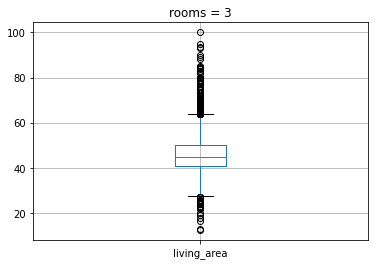

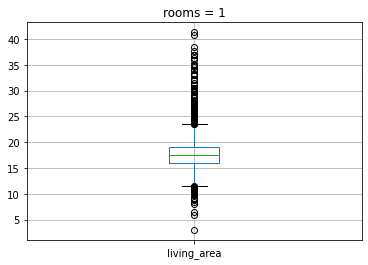

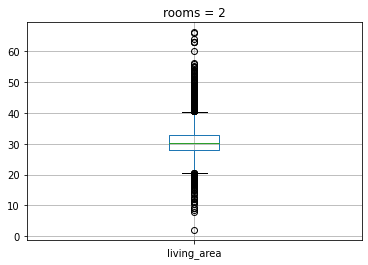

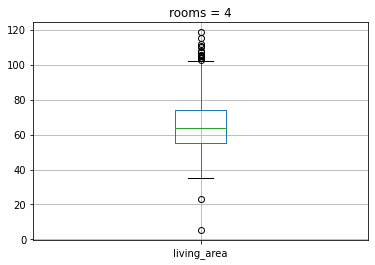

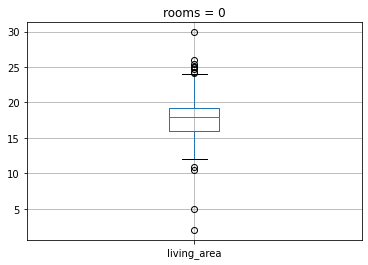

In [28]:
for room in data['rooms'].unique():
    data.query('rooms == @room').boxplot(column=['living_area'])
    plt.title('rooms = %i' %room)
    plt.show()

Комментарий: Оценим пока какие данные будут считаться выбросом:

<AxesSubplot:>

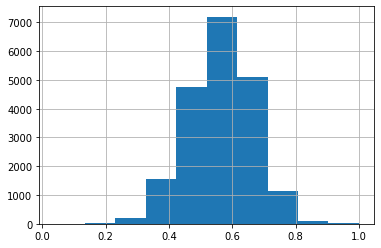

In [29]:
(data['living_area']/data['total_area']).hist()

Комментарий: Явно, что площадь жилых помещений не может быть меньше определенного значения, и занимать все пространство она также не может, определим следующие границы отношения **living_area** к **total_area**.

In [30]:
index_to_drop_living_area = data.loc[((data['living_area']/data['total_area'] < 0.35)
         | (data['living_area']/data['total_area'] > 0.75)) 
         | (data['living_area'] + data['kitchen_area'] >= data['total_area']) ].index
print('К удалению:',len(index_to_drop_living_area))

К удалению: 806


In [31]:
print('Количество до удаления:',len(data))
data.drop(index_to_drop_living_area, inplace=True)
print('Количество оставшихся данных:', len(data))

Количество до удаления: 21709
Количество оставшихся данных: 20903


Комментарий: Заполним пропуски **living_area** по следующей сводной таблице:

In [32]:
compare_living_total = data.pivot_table(index='rooms', values=['total_area', 'living_area'])
compare_living_total['part'] = compare_living_total['living_area']/compare_living_total['total_area']
compare_living_total

,living_area,total_area,part
rooms,,,
0,17.497092,26.844371,0.651797
1,17.783608,36.971511,0.481008
2,31.089083,53.923357,0.576542
3,46.206468,75.018902,0.615931
4,65.354593,104.069898,0.627987


In [33]:
for room in data['rooms'].unique():
    data.loc[(data['rooms'] == room) & (data['living_area'].isna()), 'living_area'] = \
    data.loc[(data['rooms'] == room) & (data['living_area'].isna()), 'total_area']*\
    compare_living_total.loc[room, 'part']
print('Осталось пропусков living_area:',data['living_area'].isna().sum())
print('Аномалий:',len(data.query('living_area > total_area')))

Осталось пропусков living_area: 0
Аномалий: 0


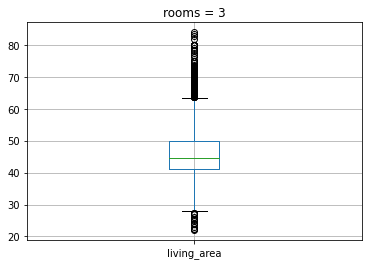

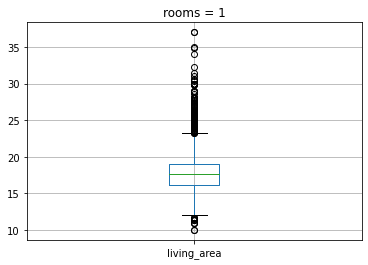

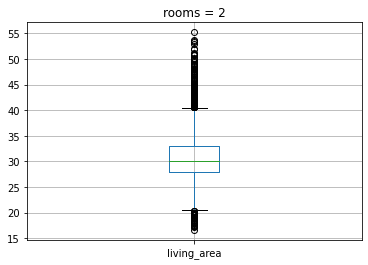

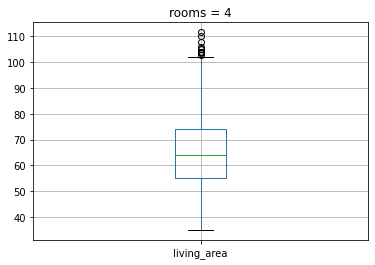

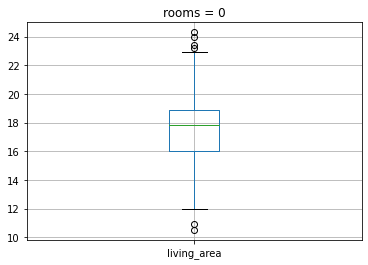

In [34]:
for room in data['rooms'].unique():
    data.query('rooms == @room').boxplot(column=['living_area'])
    plt.title('rooms = %i' %room)
    plt.show()

Комментарий:Заполним пропуски **kitchen_area** = 0 при **rooms** = 0, так как это студии. 

In [35]:
print('Количество пропусков:',data['kitchen_area'].isna().sum(), '\nКоличество студий:', len(data.query('rooms==0')))
data.loc[data['rooms'] == 0, 'kitchen_area'] = 0
print('Количество пропусков:',data['kitchen_area'].isna().sum())


Количество пропусков: 1838 
Количество студий: 151
Количество пропусков: 1687


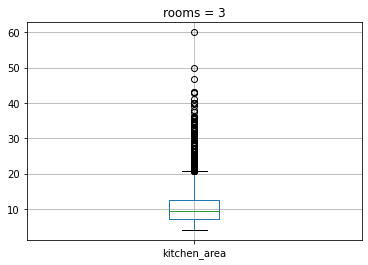

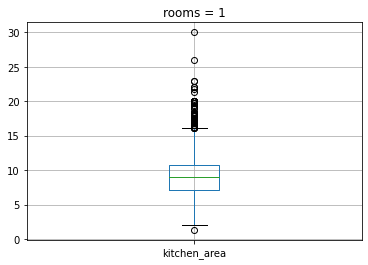

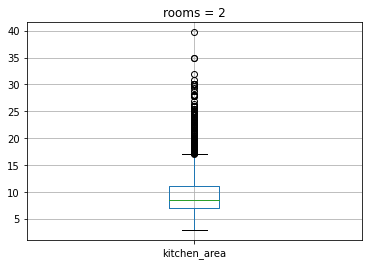

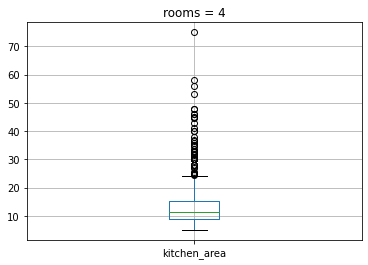

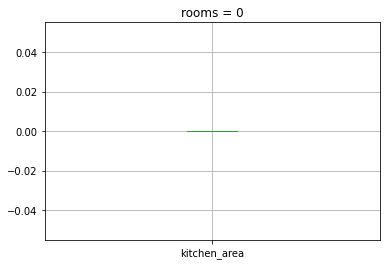

In [36]:
for room in data['rooms'].unique():
    data.query('rooms == @room').boxplot(column=['kitchen_area'])
    plt.title('rooms = %i' %room)
    plt.show()

Комментарий: Аналогично **living_area** рассмотрим какую долю **kitchen_area** занимает по отношению к **total_area**: 

<AxesSubplot:>

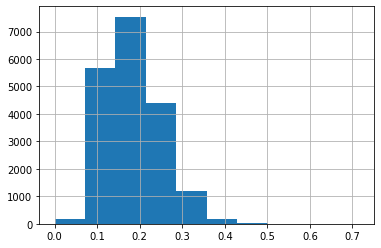

In [37]:
(data['kitchen_area']/data['total_area']).hist()

Комментарий: Определим следующие границы:

In [38]:
index_to_drop_kitchen_area = data.loc[(data['kitchen_area']/data['total_area'] > 0.4) 
         | (data['living_area'] + data['kitchen_area'] >= data['total_area'])].index
print('К удалению:',len(index_to_drop_kitchen_area))

К удалению: 82


In [39]:
print('Количество данных:',len(data))
data.drop(index_to_drop_kitchen_area, inplace=True)
print('Количество оставшихся данных:',len(data))

Количество данных: 20903
Количество оставшихся данных: 20821


Комментарий: Заполним по аналогии с **living_area**.

In [40]:
compare_kitchen_total = data.pivot_table(index='rooms', values=['total_area', 'kitchen_area'])
compare_kitchen_total['part'] = compare_kitchen_total['kitchen_area']/compare_kitchen_total['total_area']
compare_kitchen_total

,kitchen_area,total_area,part
rooms,,,
0,0.000000,26.844371,0.000000
1,9.112588,36.945724,0.246648
2,9.226898,53.906700,0.171164
3,10.627994,75.002143,0.141703
4,13.344387,103.976663,0.128340


In [41]:
for room in data['rooms'].unique():
    data.loc[(data['rooms'] == room) & (data['kitchen_area'].isna()), 'kitchen_area'] = \
    data.loc[(data['rooms'] == room) & (data['kitchen_area'].isna()), 'total_area']*\
    compare_kitchen_total.loc[room, 'part']
print('Количество пропусков kitchen_area:',data['kitchen_area'].isna().sum())
print('Аномалий:',len(data.query('kitchen_area > total_area')))

Количество пропусков kitchen_area: 0
Аномалий: 0


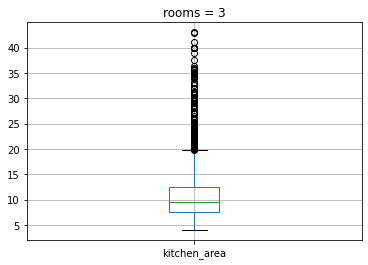

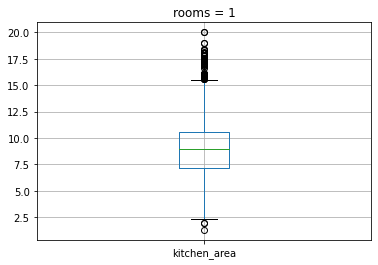

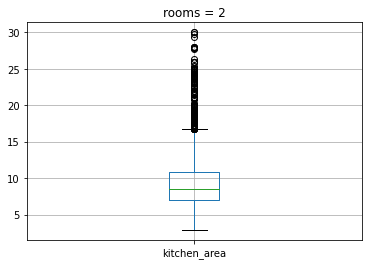

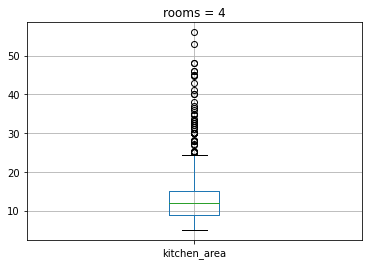

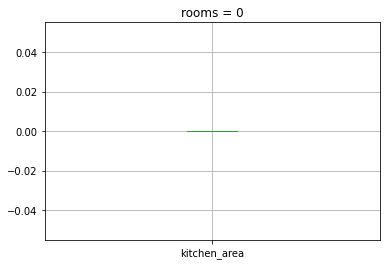

In [42]:
for room in data['rooms'].unique():
    data.query('rooms == @room').boxplot(column=['kitchen_area'])
    plt.title('rooms = %i' %room)
    plt.show()

In [43]:
print('Количество пропусков kitchen_area:',data['kitchen_area'].isna().sum())
print('Аномалий:',len(data.query('kitchen_area > total_area')))

Количество пропусков kitchen_area: 0
Аномалий: 0


Комментарий: Важно не забыть что **living_area** и **kitchen_area** не составляют всю площадь, есть еще туалет, ванная, и где то балкон, поэтому посмотрим на те квартиры, где в итоге под это совсем нет места:

<AxesSubplot:>

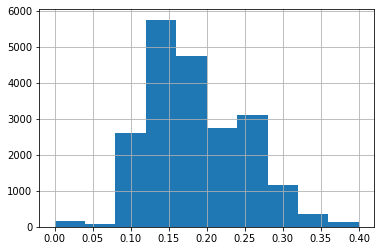

In [44]:
(data['kitchen_area']/data['total_area']).hist()

<AxesSubplot:>

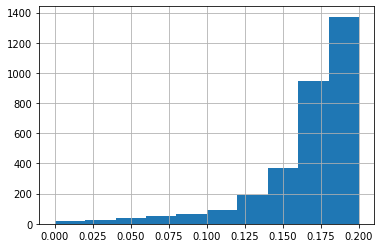

In [45]:
(1-data['kitchen_area']/data['total_area']-data['living_area']/data['total_area']).hist(range=(0,0.2))

Комменатрий: Удаление квартир, где не осталось места под ванную и т.д.

In [46]:
index_to_drop_all_area = data.loc[(1-data['kitchen_area']/data['total_area']-data['living_area']/data['total_area']) < 0.1].index
print('К удалению:', len(index_to_drop_all_area))

К удалению: 196


In [47]:
print('Количество данных:',len(data))
data.drop(index_to_drop_all_area, inplace=True)
print('Количество оставшихся данных:',len(data))

Количество данных: 20821
Количество оставшихся данных: 20625


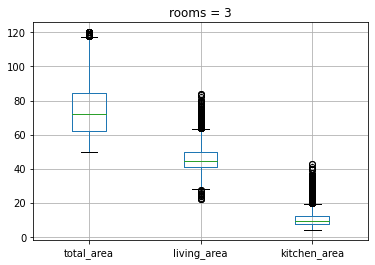

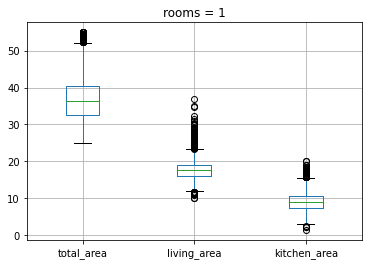

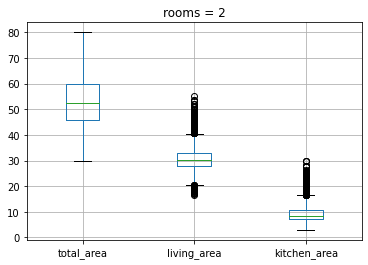

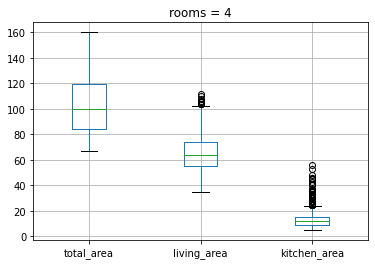

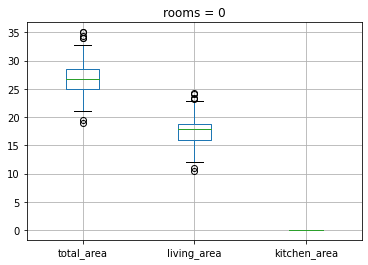

In [48]:
for room in data['rooms'].unique():
    data.query('rooms == @room').boxplot(column=['total_area','living_area','kitchen_area'])
    plt.title('rooms = %i' %room)
    plt.show()

Комментарий: Со столбцами **total_area**, **living_area** и **kitchen_area** приходится тяжелее всего, ведь очень сложно определить адекватность размеров помещения, удалив **rooms** > 4 мы избавились от большинства аномалий в **total_area**, однако нельзя исключать локальные, а имеено при группировке по **rooms** бывали весьма интересные объекты, но сложно прикинуть границу адекватной квартиры для всех трех параметров. Я постарался делать это на основе отношений и построения hist(), надеюсь это было верным решением.

Комментарий: Теперь возьмёмся за расстояния от парков, прудов и аэропортов. Группировать будем по **locality_name**, поэтому сначала рассмотрим этот столбец: 

In [49]:
print(len(data['locality_name'].unique()))
data['locality_name'].unique()

357


array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Мурино', 'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин',
       'посёлок Парголово', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'Сланцы', 'село Путилово', 'Ивангород',
    

Комментарий: Как мы видим, есть названия населенных пунктов которые дублируются с приписками, иногда без, иногда "е", иногда "ё", думаю лучшим способо будет удалить приписки такие как дереня, посёлок и другие. К сожалению нет никаких координат, но все объекты вроде как Ленинградской области, поэтому путем считать поселок Шушары и Шушары одним и тем же, хотя у нас нет точных координат и я не уверен в правильности определения поселка в частности к Шушаром рядом с Питером, поэтому пока просто оставлю лишь названия, без административного статуса. 

In [50]:
list_to_delete_name = ['садоводческое некоммерческое товарищество', 'садовое товарищество','посёлок при железнодорожной станции',
                 'поселок городского типа', 'посёлок городского типа', 'городской поселок', 'городской посёлок',
                 'коттеджный поселок','коттеджный посёлок', 'деревня', 'посёлок', 'поселок',  'село', 'станции']

In [51]:
for text in list_to_delete_name:
    data['locality_name'] = data['locality_name'].str.replace(text,'')
    data['locality_name'] = data['locality_name'].str.strip()

In [52]:
print(len(data['locality_name'].unique()))
data['locality_name'].unique()

299


array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Мурино', 'Ломоносов',
       'Сертолово', 'Петергоф', 'Пушкин', 'Парголово', 'Кудрово',
       'Коммунар', 'Колпино', 'Красный Бор', 'Гатчина', 'Фёдоровское',
       'Выборг', 'Кронштадт', 'Кировск', 'Новое Девяткино',
       'Металлострой', 'Лебяжье', 'Сиверский', 'Молодцово',
       'Кузьмоловский', 'Павловск', 'Пикколово', 'Всеволожск', 'Волхов',
       'Кингисепп', 'Приозерск', 'Сестрорецк', 'Куттузи', 'Аннино',
       'Ефимовский', 'Плодовое', 'Заклинье', 'Торковичи', 'Первомайское',
       'Красное Село', 'Понтонный', 'Сясьстрой', 'Старая', 'Лесколово',
       'Сланцы', 'Путилово', 'Ивангород', 'Шлиссельбург', 'Никольское',
       'Зеленогорск', 'Сосновый Бор', 'Кальтино', 'Романовка', 'Бугры',
       'Рощино', 'Кириши', 'Луга', 'Волосово', 'Отрадное', 'Павлово',
       'Копорье', 'Молодёжное', 'Тихвин', 'Победа', 'Нурма', 'Синявино',
       'Тосно', 'Новый Свет', 'Стрельна', 'Бокситогорск', 'Лопухинка',
       'Пикалёво', 'Терволов

In [53]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5006
cityCenters_nearest      4991
parks_around3000         4990
parks_nearest           13914
ponds_around3000         4990
ponds_nearest           13072
days_exposition          2616
dtype: int64

Комментарий: Судя по оставшимся пропускам, пропущенные значения при **parks_nearest** и **parks_around3000** соотносятся с пропущенными значениями **ponds_nearest** и **ponds_around3000**. Возможно, от этих населенных пунктов парки достаточно далеко и поэтому данных о парка и прудах рядом не вводилось или в анкете этому просто не предавалось значение.

In [54]:
data.pivot_table(index='locality_name', values=['airports_nearest', 'cityCenters_nearest', 'parks_nearest', 'ponds_nearest'])

,airports_nearest,cityCenters_nearest,parks_nearest,ponds_nearest
locality_name,,,,
Александровская,12781.000000,27352.000000,NaN,509.000000
Белоостров,57769.000000,38868.000000,NaN,320.000000
Зеленогорск,73259.095238,54607.619048,224.400000,468.250000
Колпино,26369.776730,32117.578616,485.047244,532.138889
Красное Село,26657.466258,30082.171779,469.763158,477.166667
Кронштадт,67396.133333,49122.633333,330.573171,350.243902
Левашово,52693.000000,25727.000000,NaN,NaN
Лисий Нос,55302.333333,27613.333333,NaN,NaN
Ломоносов,48293.641026,50728.076923,377.166667,549.391892


In [55]:
around3000_median = data.pivot_table(index='locality_name', values=['parks_around3000', 'ponds_around3000'], aggfunc='median')
around3000_median

,parks_around3000,ponds_around3000
locality_name,,
Александровская,0.0,1.0
Белоостров,0.0,1.0
Зеленогорск,3.0,1.0
Колпино,0.0,1.0
Красное Село,0.0,0.0
Кронштадт,2.0,2.0
Левашово,0.0,0.0
Лисий Нос,0.0,0.0
Ломоносов,0.0,1.0


Комментарий: Соотнося две предыдущие сводные таблицы можно сделать два вывода: 1) К примеру в локации **Александровская** **parks_nearest** среднее равно NaN и **parks_around3000** медианное равно 0, гипотеза с тем, что парки далеко подтверждается, однако 2) локации **Ломоносов** **parks_nearest** среднее не равно NaN, а **parks_around3000** медианное равно 0. Обратив внимание на последний вывод, можно сказать, что если мы сначала заполним все NaN этими двумя сводными таблицами, может возникнуть случай, когда **parks_nearest** будет среднее < 3000м, а **parks_around** = 0 по медианному. Таким образом их надо обрабатывать вместе, а стобцы **airports_nearest** и **cityCenter_nearest** можем спокойно заполнить средним.

Количество оставшихся пропусков airports_nearest: 4951


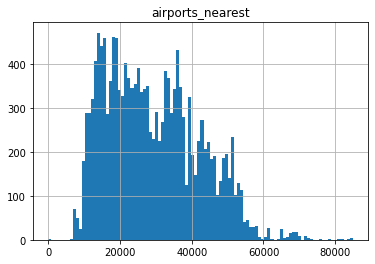

In [56]:
data.hist('airports_nearest', bins=100)
data['airports_nearest'] = data['airports_nearest'].fillna(data.groupby('locality_name')['airports_nearest'].transform('mean'))
print('Количество оставшихся пропусков airports_nearest:',data['airports_nearest'].isna().sum())

Комментарий: Такой близости с аэропортом быть не может - удалим.

In [57]:
data.drop(data.query('airports_nearest < 3000').index, inplace=True)

Количество оставшихся пропусков cityCenters_nearest: 4951


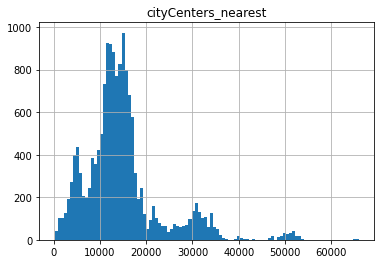

In [58]:
data.hist('cityCenters_nearest', bins=100)
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(data.groupby('locality_name')['cityCenters_nearest'].transform('mean'))
print('Количество оставшихся пропусков cityCenters_nearest:',data['cityCenters_nearest'].isna().sum())

Комментарий: Явных выбросов **cityCenters_nearest** нет.

In [59]:
data.query('cityCenters_nearest < 1000')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1104,0,7970000.0,63.00,2018-02-09T00:00:00,3,2.6,5.0,35.000000,3,False,...,10.000000,1,Санкт-Петербург,21135.0,743.0,2.0,278.0,3.0,265.0,15.0
1182,1,5800000.0,33.60,2016-03-10T00:00:00,1,2.6,7.0,22.800000,4,False,...,6.600000,0,Санкт-Петербург,21632.0,208.0,3.0,304.0,3.0,503.0,167.0
1351,14,8500000.0,66.20,2019-02-27T00:00:00,3,3.0,4.0,37.400000,4,False,...,9.400000,1,Санкт-Петербург,20993.0,835.0,0.0,NaN,2.0,243.0,NaN
1876,12,11490000.0,74.00,2016-08-31T00:00:00,3,2.7,5.0,45.400000,5,False,...,9.800000,1,Санкт-Петербург,20717.0,936.0,3.0,333.0,2.0,29.0,469.0
2478,1,4000000.0,39.00,2018-02-08T00:00:00,2,3.1,5.0,25.900000,1,False,...,5.400000,1,Санкт-Петербург,22276.0,853.0,1.0,888.0,2.0,134.0,4.0
2609,20,7200000.0,80.00,2017-08-24T00:00:00,3,2.8,4.0,43.000000,1,False,...,8.000000,0,Санкт-Петербург,21832.0,399.0,3.0,415.0,2.0,516.0,11.0
2744,5,10000000.0,100.40,2018-07-10T00:00:00,3,2.6,4.0,55.000000,4,False,...,15.000000,1,Санкт-Петербург,20802.0,801.0,3.0,480.0,2.0,145.0,268.0
3800,12,6900000.0,47.60,2015-07-22T00:00:00,2,2.6,5.0,28.200000,5,False,...,8.200000,0,Санкт-Петербург,22074.0,472.0,3.0,319.0,3.0,142.0,398.0
5014,13,15000000.0,70.00,2018-01-10T00:00:00,2,2.6,4.0,48.000000,4,False,...,9.000000,1,Санкт-Петербург,22120.0,686.0,1.0,945.0,2.0,38.0,167.0
5017,5,12999000.0,102.00,2017-02-16T00:00:00,4,3.2,6.0,69.000000,2,False,...,10.000000,0,Санкт-Петербург,20944.0,820.0,0.0,NaN,2.0,440.0,89.0


Комментарий: Как мы можем заметить, количество пропусков не сильно уменьшилось и при более детально просмотре этих данных было выявлено, что все таки это Ленинградская область, а центр города видимо считается Санкт-Петербург, расстояние в м весьма значительные. Что касается оставшихся пропусков, заполнять их средним и нулями приведет к неточностям, а данных географических у нас нет, поэтому оптимально будет оставить их пропусками, чтобы они не участвовали в анализе, когда конкретно эти столбцы будут привлекатся.

Комментарий: **parks_nearest** и **ponds_nearest** заполним средними по **locality_name**, там где данных нет, оставим пропусками как в случае с расстояниями до центра города и аэропорта. **parks_around3000** и **ponds_around3000** заполним медианным по **locality_name**, но только в случае, если  **parks_nearest** и **ponds_nearest** не NaN.

Количество оставшихся пропусков parks_nearest: 5470


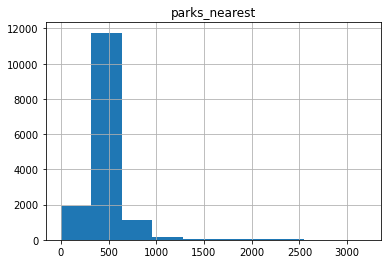

In [60]:
data['parks_nearest'] = data['parks_nearest'].fillna(data.groupby('locality_name')['parks_nearest'].transform('mean'))
data.hist('parks_nearest')
print('Количество оставшихся пропусков parks_nearest:',data['parks_nearest'].isna().sum())

Комментарий: Вполне возможные значения.

In [61]:
data.query('parks_nearest < 10')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
2527,8,4690000.0,60.3,2016-03-05T00:00:00,2,2.5,5.0,28.000000,2,False,...,7.9,0,Кронштадт,69775.0,51500.0,3.0,9.0,3.0,345.0,146.0
9344,12,3000000.0,28.1,2017-07-25T00:00:00,1,2.5,9.0,17.000000,1,False,...,5.6,1,Санкт-Петербург,12051.0,11665.0,1.0,7.0,1.0,780.0,440.0
11949,7,4500000.0,44.0,2017-11-24T00:00:00,2,2.6,9.0,30.000000,7,False,...,7.0,1,Санкт-Петербург,11806.0,12292.0,1.0,3.0,1.0,508.0,82.0
14624,8,3770000.0,45.4,2019-03-20T00:00:00,2,2.6,9.0,28.430000,2,False,...,6.9,1,Санкт-Петербург,43932.0,16436.0,1.0,1.0,0.0,NaN,42.0
20193,3,11809670.0,102.6,2017-04-21T00:00:00,3,2.6,9.0,63.194522,3,False,...,17.8,2,Санкт-Петербург,27562.0,6410.0,2.0,9.0,2.0,480.0,90.0


Количество оставшихся пропусков ponds_nearest: 5033


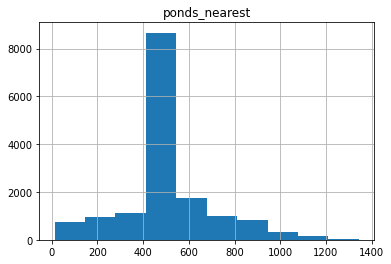

In [62]:
data['ponds_nearest'] = data['ponds_nearest'].fillna(data.groupby('locality_name')['ponds_nearest'].transform('mean'))
data.hist('ponds_nearest')
print('Количество оставшихся пропусков ponds_nearest:',data['ponds_nearest'].isna().sum())

Комментарий: Конечно, количество пропусков прудов и парков все еще остается большим, но их в данный момент времени и при имеющихся данных, сложно заполнить так, чтобы не исказить данные.

Комментарий: Преобразуем **airports_nearest, cityCenters_nearest, parks_nearest, ponds_nearest, parks_around3000, ponds_around3000** в Int64.

In [63]:
for col in ['airports_nearest', 'cityCenters_nearest', 'parks_nearest', 'ponds_nearest', 'parks_around3000', 'ponds_around3000']:
     data[col] = data[col].round(0).astype('Int64')
data.dtypes

total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     uint8
ceiling_height          float64
floors_total            float64
living_area             float64
floor                     int64
is_apartment               bool
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                   uint8
locality_name            object
airports_nearest          Int64
cityCenters_nearest       Int64
parks_around3000          Int64
parks_nearest             Int64
ponds_around3000          Int64
ponds_nearest             Int64
days_exposition         float64
dtype: object

Комментарий: Теперь рассмотрим столбец **days_exposition**.

array([[<AxesSubplot:title={'center':'days_exposition'}>]], dtype=object)

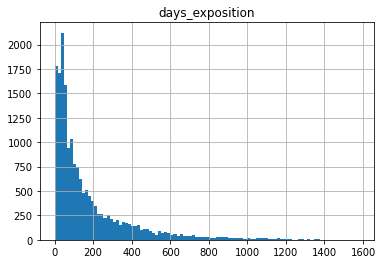

In [64]:
data.hist('days_exposition', bins=100)

Комментарий: диаграмма похожа на распределение Пуассона, будем считать, что данные в порядке, заполним пропуски группируя по **locality_name** и **rooms**.

In [65]:
data.groupby(['locality_name','rooms'])['days_exposition'].mean()

locality_name    rooms
Агалатово        1         42.000000
                 2          5.000000
                 3        624.000000
Александровская  2         45.000000
Алексеевка       2        416.000000
                             ...    
имени Морозова   3        271.800000
                 4        256.000000
имени Свердлова  1        105.750000
                 2         63.750000
                 3        128.111111
Name: days_exposition, Length: 679, dtype: float64

In [66]:
data['days_exposition'] = data['days_exposition'].fillna(data.groupby(['locality_name','rooms'])['days_exposition'].transform('mean'))
print('Осталось пропусков days_exposition:',data['days_exposition'].isna().sum())

Осталось пропусков days_exposition: 74


Комментарий: Удалим остаток пропусков.

In [67]:
print('Количество данных до удаления:',len(data))
data.drop(data[data['days_exposition'].isna()].index, inplace=True)
print('Количество данных после удаления:',len(data))

Количество данных до удаления: 20624
Количество данных после удаления: 20550


Комментарий: Изменим формат **days_exposition** на int. Дни у нас целочисленные.

In [68]:
data['days_exposition'] = data['days_exposition'].astype('uint')
data.dtypes

total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     uint8
ceiling_height          float64
floors_total            float64
living_area             float64
floor                     int64
is_apartment               bool
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                   uint8
locality_name            object
airports_nearest          Int64
cityCenters_nearest       Int64
parks_around3000          Int64
parks_nearest             Int64
ponds_around3000          Int64
ponds_nearest             Int64
days_exposition          uint64
dtype: object

Комментарий: Обработаем различные аномалии и выбросы из уже известных данных.

In [69]:
print(len(data.query('floors_total < floor')))
print(len(data.query('last_price == 0 or days_exposition == 0')))

0
0


<AxesSubplot:>

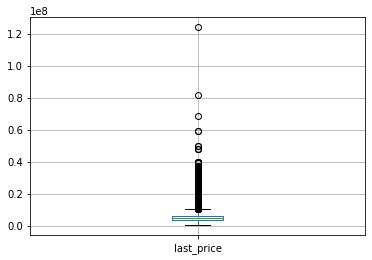

In [70]:
data.boxplot('last_price')

In [71]:
data.query('last_price > 0.175*10**8')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
63,2,20000000.0,118.0,2018-09-11T00:00:00,3,3.0,9.0,68.00,7,False,...,16.00,1,Санкт-Петербург,26055,4800,1,648,1,779,37
177,3,21042018.0,154.9,2017-09-10T00:00:00,4,3.3,16.0,89.11,3,False,...,21.30,1,Санкт-Петербург,37434,8460,1,441,2,427,563
233,17,19800000.0,118.0,2017-12-15T00:00:00,3,2.8,25.0,62.00,3,False,...,21.50,1,Санкт-Петербург,36827,12348,1,485,1,474,201
239,16,22000000.0,119.0,2017-02-16T00:00:00,3,2.6,5.0,56.00,3,False,...,35.00,0,Санкт-Петербург,21698,2004,1,688,1,86,77
262,14,37500000.0,158.0,2019-01-24T00:00:00,4,2.6,12.0,88.00,4,False,...,40.00,1,Санкт-Петербург,25799,4593,0,501,2,840,266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23240,20,21800000.0,114.0,2019-04-22T00:00:00,3,2.8,15.0,64.40,7,False,...,23.30,1,Санкт-Петербург,37106,8256,1,2009,3,253,201
23307,4,17900000.0,120.0,2019-02-09T00:00:00,4,2.6,4.0,79.00,1,False,...,24.00,1,Санкт-Петербург,43758,15461,1,756,2,278,266
23446,19,27000000.0,110.0,2016-03-11T00:00:00,3,2.6,7.0,63.00,5,False,...,15.00,1,Санкт-Петербург,26819,5026,1,657,1,678,200
23516,3,22529250.0,139.5,2018-07-04T00:00:00,4,3.3,16.0,82.55,9,False,...,13.84,1,Санкт-Петербург,37434,8460,1,441,2,427,266


Комментарий: Пусть и стоимость сильно выше остальных, но вполне реальная для квартиры в центре Питера.

Комментарий: Изменим тип столбцов **last_price** и **floors_total** на int. Дробная часть для этажа не нужна вообще, а для цены она не важна при таких больших значениях.

In [72]:
data['last_price'] = data['last_price'].astype('uint')
data['floors_total'] = data['floors_total'].astype('uint8')
data.dtypes

total_images              int64
last_price               uint64
total_area              float64
first_day_exposition     object
rooms                     uint8
ceiling_height          float64
floors_total              uint8
living_area             float64
floor                     int64
is_apartment               bool
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                   uint8
locality_name            object
airports_nearest          Int64
cityCenters_nearest       Int64
parks_around3000          Int64
parks_nearest             Int64
ponds_around3000          Int64
ponds_nearest             Int64
days_exposition          uint64
dtype: object

Комментарий: Сделаем формат для столбца **first_day_exposition** datetime.

In [73]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.0,2019-03-07,3,2.7,16,51.000000,8,False,...,25.0,1,Санкт-Петербург,18863,16028,1,482,2,755,201
1,7,3350000,40.4,2018-12-04,1,2.6,11,18.600000,1,False,...,11.0,2,Шушары,12817,18603,0,<NA>,0,578,81
2,10,5196000,56.0,2015-08-20,2,2.6,5,34.300000,4,False,...,8.3,0,Санкт-Петербург,21741,13933,1,90,2,574,558
5,10,2890000,30.4,2018-09-10,1,2.6,12,14.400000,5,False,...,9.1,1,Янино-1,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,55
7,5,7915000,71.6,2019-04-18,2,2.6,24,41.280411,22,False,...,18.9,2,Санкт-Петербург,23982,11634,0,501,0,531,162


Комментарий: Предобработка завершена, необходимо обновить индексы.

In [74]:
data.reset_index(drop=True, inplace = True)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.0,2019-03-07,3,2.7,16,51.000000,8,False,...,25.0,1,Санкт-Петербург,18863,16028,1,482,2,755,201
1,7,3350000,40.4,2018-12-04,1,2.6,11,18.600000,1,False,...,11.0,2,Шушары,12817,18603,0,<NA>,0,578,81
2,10,5196000,56.0,2015-08-20,2,2.6,5,34.300000,4,False,...,8.3,0,Санкт-Петербург,21741,13933,1,90,2,574,558
3,10,2890000,30.4,2018-09-10,1,2.6,12,14.400000,5,False,...,9.1,1,Янино-1,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,55
4,5,7915000,71.6,2019-04-18,2,2.6,24,41.280411,22,False,...,18.9,2,Санкт-Петербург,23982,11634,0,501,0,531,162


### Новые столбцы

In [75]:
data['price_for_square'] = (data['last_price']/data['total_area']).round(0).astype('int')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_square
0,20,13000000,108.0,2019-03-07,3,2.7,16,51.000000,8,False,...,1,Санкт-Петербург,18863,16028,1,482,2,755,201,120370
1,7,3350000,40.4,2018-12-04,1,2.6,11,18.600000,1,False,...,2,Шушары,12817,18603,0,<NA>,0,578,81,82921
2,10,5196000,56.0,2015-08-20,2,2.6,5,34.300000,4,False,...,0,Санкт-Петербург,21741,13933,1,90,2,574,558,92786
3,10,2890000,30.4,2018-09-10,1,2.6,12,14.400000,5,False,...,1,Янино-1,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,55,95066
4,5,7915000,71.6,2019-04-18,2,2.6,24,41.280411,22,False,...,2,Санкт-Петербург,23982,11634,0,501,0,531,162,110545


In [76]:
data['weekday_exposition'] = data['first_day_exposition'].dt.dayofweek
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_square,weekday_exposition
0,20,13000000,108.0,2019-03-07,3,2.7,16,51.000000,8,False,...,Санкт-Петербург,18863,16028,1,482,2,755,201,120370,3
1,7,3350000,40.4,2018-12-04,1,2.6,11,18.600000,1,False,...,Шушары,12817,18603,0,<NA>,0,578,81,82921,1
2,10,5196000,56.0,2015-08-20,2,2.6,5,34.300000,4,False,...,Санкт-Петербург,21741,13933,1,90,2,574,558,92786,3
3,10,2890000,30.4,2018-09-10,1,2.6,12,14.400000,5,False,...,Янино-1,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,55,95066,0
4,5,7915000,71.6,2019-04-18,2,2.6,24,41.280411,22,False,...,Санкт-Петербург,23982,11634,0,501,0,531,162,110545,3


In [77]:
data['month_exposition'] = data['first_day_exposition'].dt.month
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_square,weekday_exposition,month_exposition
0,20,13000000,108.0,2019-03-07,3,2.7,16,51.000000,8,False,...,18863,16028,1,482,2,755,201,120370,3,3
1,7,3350000,40.4,2018-12-04,1,2.6,11,18.600000,1,False,...,12817,18603,0,<NA>,0,578,81,82921,1,12
2,10,5196000,56.0,2015-08-20,2,2.6,5,34.300000,4,False,...,21741,13933,1,90,2,574,558,92786,3,8
3,10,2890000,30.4,2018-09-10,1,2.6,12,14.400000,5,False,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,55,95066,0,9
4,5,7915000,71.6,2019-04-18,2,2.6,24,41.280411,22,False,...,23982,11634,0,501,0,531,162,110545,3,4


In [78]:
data['year_exposition'] = data['first_day_exposition'].dt.year
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_square,weekday_exposition,month_exposition,year_exposition
0,20,13000000,108.0,2019-03-07,3,2.7,16,51.000000,8,False,...,16028,1,482,2,755,201,120370,3,3,2019
1,7,3350000,40.4,2018-12-04,1,2.6,11,18.600000,1,False,...,18603,0,<NA>,0,578,81,82921,1,12,2018
2,10,5196000,56.0,2015-08-20,2,2.6,5,34.300000,4,False,...,13933,1,90,2,574,558,92786,3,8,2015
3,10,2890000,30.4,2018-09-10,1,2.6,12,14.400000,5,False,...,<NA>,<NA>,<NA>,<NA>,<NA>,55,95066,0,9,2018
4,5,7915000,71.6,2019-04-18,2,2.6,24,41.280411,22,False,...,11634,0,501,0,531,162,110545,3,4,2019


In [79]:
def define_type_floor(row):
    if row.loc['floor'] == 1:
        return 'первый'
    elif row.loc['floor'] == row.loc['floors_total']:
        return 'последний'
    else:
        return 'другой'

In [80]:
data['type_floor'] = data.apply(define_type_floor, axis=1)
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_square,weekday_exposition,month_exposition,year_exposition,type_floor
0,20,13000000,108.00,2019-03-07,3,2.7,16,51.000000,8,False,...,1,482,2,755,201,120370,3,3,2019,другой
1,7,3350000,40.40,2018-12-04,1,2.6,11,18.600000,1,False,...,0,<NA>,0,578,81,82921,1,12,2018,первый
2,10,5196000,56.00,2015-08-20,2,2.6,5,34.300000,4,False,...,1,90,2,574,558,92786,3,8,2015,другой
3,10,2890000,30.40,2018-09-10,1,2.6,12,14.400000,5,False,...,<NA>,<NA>,<NA>,<NA>,55,95066,0,9,2018,другой
4,5,7915000,71.60,2019-04-18,2,2.6,24,41.280411,22,False,...,0,501,0,531,162,110545,3,4,2019,другой
5,20,2900000,33.16,2018-05-23,1,2.6,27,15.430000,26,False,...,<NA>,<NA>,<NA>,<NA>,189,87455,2,5,2018,другой
6,18,5400000,61.00,2017-02-26,3,2.5,9,43.600000,7,False,...,0,501,0,531,289,88525,6,2,2017,другой
7,5,5050000,39.60,2017-11-16,1,2.7,12,20.300000,3,False,...,1,310,2,553,137,127525,3,11,2017,другой
8,9,3300000,44.00,2018-08-27,2,2.6,5,31.000000,4,False,...,0,377,0,549,7,75000,0,8,2018,другой
9,10,3890000,54.00,2016-06-30,2,2.6,5,30.000000,5,False,...,<NA>,<NA>,<NA>,<NA>,90,72037,3,6,2016,последний


In [81]:
data['cityCenters_nearest_km'] = (data['cityCenters_nearest']/1000)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_square,weekday_exposition,month_exposition,year_exposition,type_floor,cityCenters_nearest_km
0,20,13000000,108.0,2019-03-07,3,2.7,16,51.000000,8,False,...,482,2,755,201,120370,3,3,2019,другой,16.028
1,7,3350000,40.4,2018-12-04,1,2.6,11,18.600000,1,False,...,<NA>,0,578,81,82921,1,12,2018,первый,18.603
2,10,5196000,56.0,2015-08-20,2,2.6,5,34.300000,4,False,...,90,2,574,558,92786,3,8,2015,другой,13.933
3,10,2890000,30.4,2018-09-10,1,2.6,12,14.400000,5,False,...,<NA>,<NA>,<NA>,55,95066,0,9,2018,другой,<NA>
4,5,7915000,71.6,2019-04-18,2,2.6,24,41.280411,22,False,...,501,0,531,162,110545,3,4,2019,другой,11.634


### Исследовательский анализ данных

Комментарий: Немного не понимаю, что подразумевается под изучить данные, ведь мы уже рассмотрели их в разделе предобработки. Построим гистограммы и дам комментарии к каждому параметру.

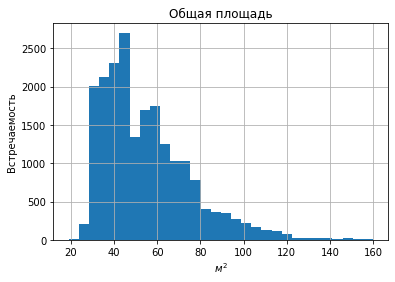

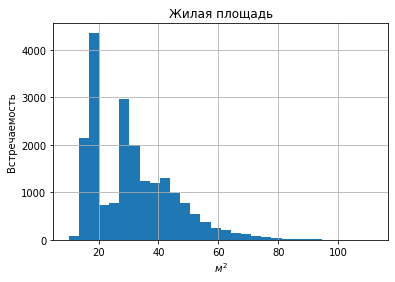

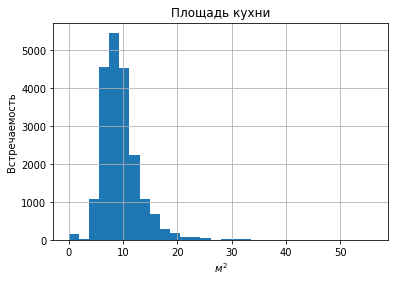

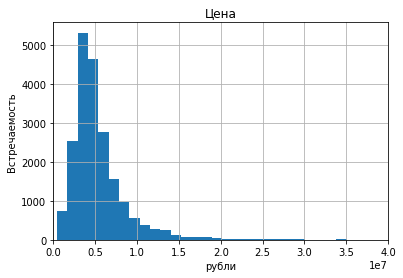

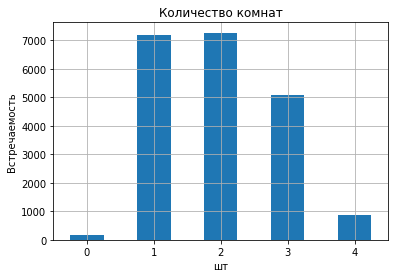

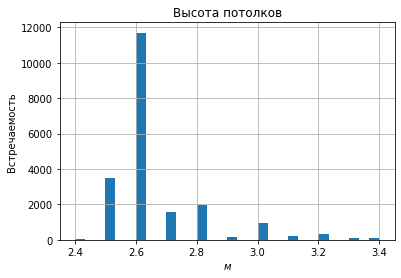

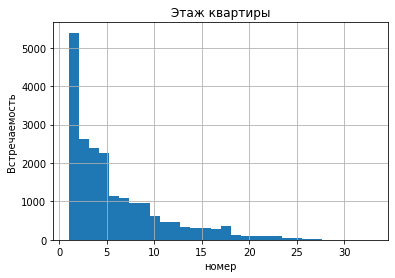

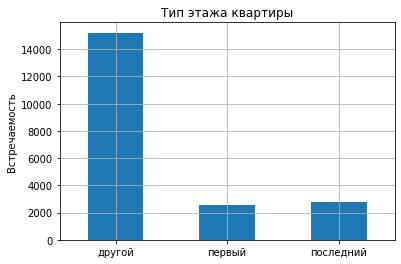

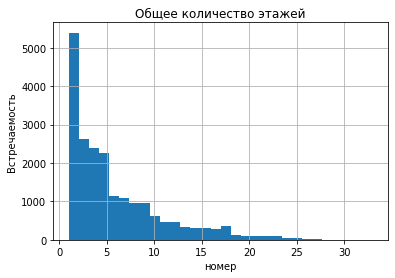

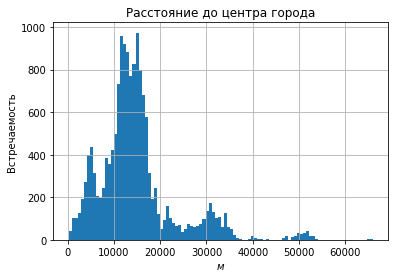

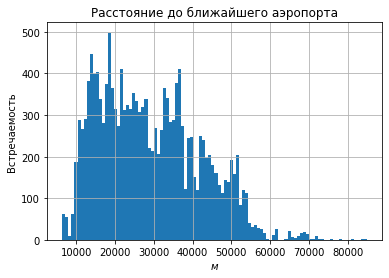

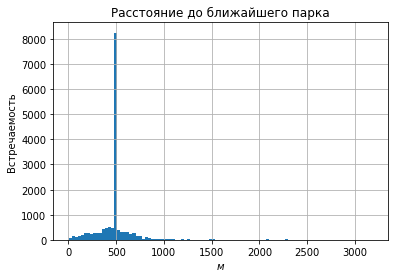

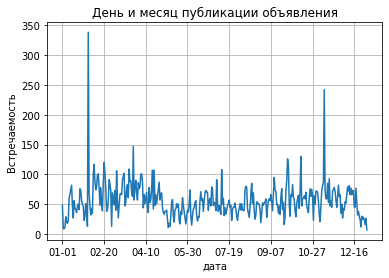

In [82]:
data['total_area'].plot(kind = 'hist', title='Общая площадь', grid=True, bins = 30)
plt.ylabel('Встречаемость')
plt.xlabel('$м^2$')
plt.show()

data['living_area'].plot(kind = 'hist', title='Жилая площадь', grid=True, bins = 30)
plt.ylabel('Встречаемость')
plt.xlabel('$м^2$')
plt.show()

data['kitchen_area'].plot(kind = 'hist', title='Площадь кухни', grid=True, bins = 30)
plt.ylabel('Встречаемость')
plt.xlabel('$м^2$')
plt.show()

data['last_price'].plot(kind = 'hist', title='Цена', grid=True, bins = 100)
plt.ylabel('Встречаемость')
plt.xlabel('рубли')
plt.xlim((0, 0.4*10**8))
plt.show()

data['rooms'].value_counts(sort=False).plot.bar(grid = True, rot = 0)
plt.title('Количество комнат')
plt.ylabel('Встречаемость')
plt.xlabel('шт')
plt.show()

data['ceiling_height'].plot(kind = 'hist', title='Высота потолков', grid=True, bins = 30)
plt.ylabel('Встречаемость')
plt.xlabel('$м$')
plt.show()

data['floor'].plot(kind = 'hist', title='Этаж квартиры', grid=True, bins = 30)
plt.ylabel('Встречаемость')
plt.xlabel('номер')
plt.show()

data['type_floor'].value_counts(sort=False).plot.bar(grid = True, rot = 0)
plt.title('Тип этажа квартиры')
plt.ylabel('Встречаемость')
plt.show()

data['floor'].plot(kind = 'hist', title='Общее количество этажей', grid=True, bins = 30)
plt.ylabel('Встречаемость')
plt.xlabel('номер')
plt.show()

data['cityCenters_nearest'].plot(kind = 'hist', title='Расстояние до центра города', grid=True, bins = 100)
plt.ylabel('Встречаемость')
plt.xlabel('$м$')
plt.show()

data['airports_nearest'].plot(kind = 'hist', title='Расстояние до ближайшего аэропорта', grid=True, bins = 100)
plt.ylabel('Встречаемость')
plt.xlabel('$м$')
plt.show()

data['parks_nearest'].plot(kind = 'hist', title='Расстояние до ближайшего парка', grid=True, bins = 100)
plt.ylabel('Встречаемость')
plt.xlabel('$м$')
plt.show()

data_for_date_plot = pd.DataFrame(data['first_day_exposition'])
data_for_date_plot['day_and_month'] = data_for_date_plot['first_day_exposition'].dt.strftime('%m-%d')
data_for_date_plot.sort_values(by='first_day_exposition', inplace=True)
data_for_date_plot.reset_index(drop=True)
data_for_date_plot.groupby('day_and_month')['day_and_month'].count().plot(grid=True)
plt.title('День и месяц публикации объявления')
plt.ylabel('Встречаемость')
plt.xlabel('дата')
plt.show()

Комментарий: Общая площадь и площадь кухни выглядят нормально, а вот жилая имеет интересную просадку в области от 20 до ~35 м^2. Цена также выглядит как обычно, количество комнат в норме, высота потолков выглядит ровно так, как мы ее и обработали, большинство приходится на среднее. Этаж квартиры, тип этажа и общее количество выглядит адекватно. Расстояния до центра города и аэропорта выглядят, по моему мнению, нормально, а вот расстояние до ближайшего парка выглядит ровно так, как мы его обработали, большинство значений приходится на среднее, хоть мы и заполняли группировкой по названию локации. График дня и месяца публикации выглядит равномерным, однако есть два выброса, между январем и февралем и между октябрем и ноябрем.

#### Как быстро продавались квартиры?

count    20550.000000
mean       176.770462
std        201.657106
min          1.000000
25%         45.000000
50%        116.000000
75%        210.000000
max       1580.000000
Name: days_exposition, dtype: float64


<AxesSubplot:>

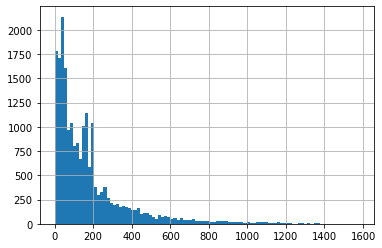

In [83]:
print(data['days_exposition'].describe())
data['days_exposition'].hist(bins = 100)

Комментарий: Самая быстрая "продажа" за один день, но так как у нас данные по публикованию и снятию объявлений, то реальнее всего, что быстра продажа это до первого квантиля или меньше чем за 45 дней. Обычно продажа занимает 120 дней, округлим медиану до 4 месяцев, среднее сильно искажено из-за очень длительных объявлений, которые скорее всего давно проданы, но просто висят. Долго это скоре всего больше 3 квантиля или 210 дней, это точно долго.

#### Какие факторы больше всего влияют на общую (полную) стоимость объекта?

array([[<AxesSubplot:xlabel='last_price', ylabel='last_price'>,
        <AxesSubplot:xlabel='total_area', ylabel='last_price'>,
        <AxesSubplot:xlabel='living_area', ylabel='last_price'>,
        <AxesSubplot:xlabel='kitchen_area', ylabel='last_price'>],
       [<AxesSubplot:xlabel='last_price', ylabel='total_area'>,
        <AxesSubplot:xlabel='total_area', ylabel='total_area'>,
        <AxesSubplot:xlabel='living_area', ylabel='total_area'>,
        <AxesSubplot:xlabel='kitchen_area', ylabel='total_area'>],
       [<AxesSubplot:xlabel='last_price', ylabel='living_area'>,
        <AxesSubplot:xlabel='total_area', ylabel='living_area'>,
        <AxesSubplot:xlabel='living_area', ylabel='living_area'>,
        <AxesSubplot:xlabel='kitchen_area', ylabel='living_area'>],
       [<AxesSubplot:xlabel='last_price', ylabel='kitchen_area'>,
        <AxesSubplot:xlabel='total_area', ylabel='kitchen_area'>,
        <AxesSubplot:xlabel='living_area', ylabel='kitchen_area'>,
        <AxesSubp

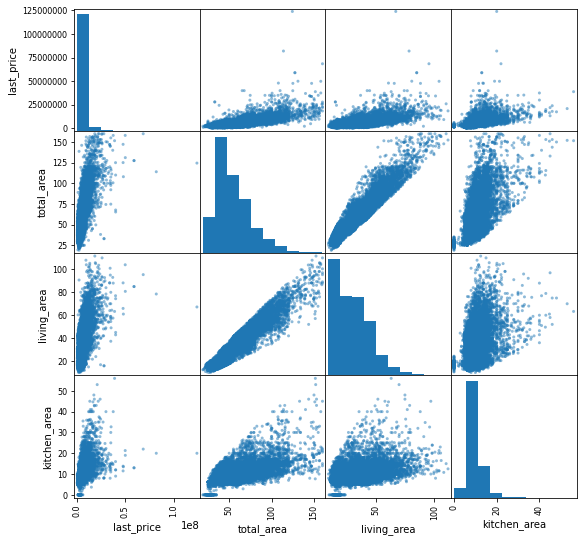

In [92]:
pd.plotting.scatter_matrix(data[['last_price', 'total_area','living_area','kitchen_area']], figsize=(9,9))

<AxesSubplot:xlabel='year_exposition', ylabel='last_price'>

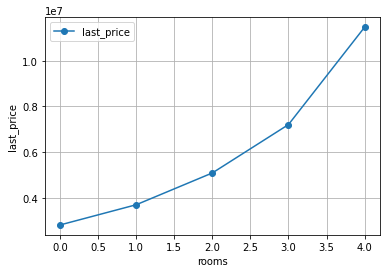

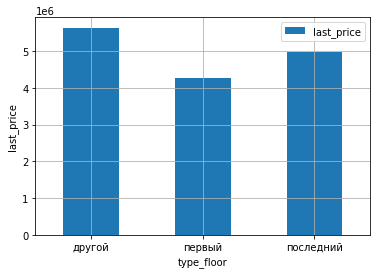

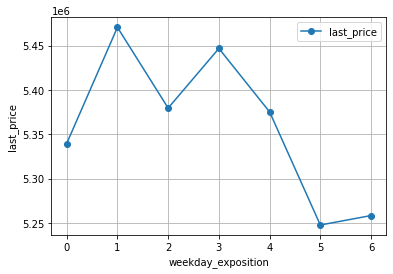

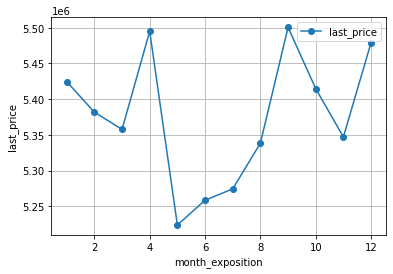

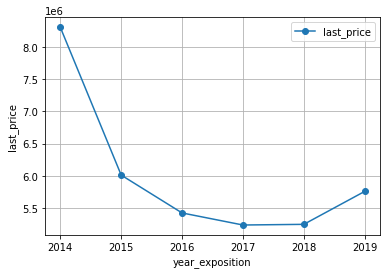

In [94]:
data.pivot_table(index=['rooms'], values='last_price').plot(grid=True, marker='o', ylabel='last_price')
data.pivot_table(index=['type_floor'], values='last_price').plot(kind='bar',grid=True, ylabel='last_price', rot=0)
data.pivot_table(index=['weekday_exposition'],values='last_price').plot(grid=True, marker='o', ylabel='last_price')
data.pivot_table(index=['month_exposition'],values='last_price').plot(grid=True, marker='o', ylabel='last_price')
data.pivot_table(index=['year_exposition'],values='last_price').plot(grid=True, marker='o', ylabel='last_price')

array([[<AxesSubplot:xlabel='last_price', ylabel='last_price'>,
        <AxesSubplot:xlabel='year_exposition', ylabel='last_price'>],
       [<AxesSubplot:xlabel='last_price', ylabel='year_exposition'>,
        <AxesSubplot:xlabel='year_exposition', ylabel='year_exposition'>]],
      dtype=object)

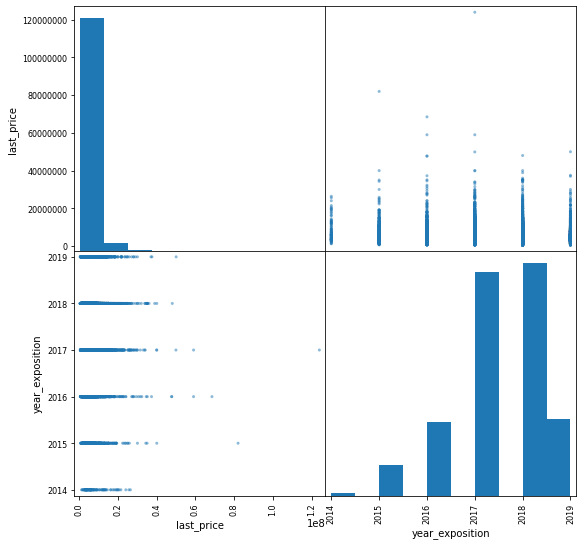

In [97]:
pd.plotting.scatter_matrix(data[['last_price','year_exposition']], figsize=(9,9))

In [91]:
data.corr()['last_price'].loc[['total_area', 'living_area','kitchen_area', 'rooms']]

total_area      0.713432
living_area     0.626472
kitchen_area    0.544098
rooms           0.479904
Name: last_price, dtype: float64

Комментарий: Мы можем посмотреть на графики корелляции **last_price, total_area, living_area, kitchen_area** и заметить, что **last_price** зависит от них, сильнее всего от **total_area**, но логично, что другие площадь также зависят от общей, что дает такой результат. На графиках после мы видим, что несомненно цена зависит от количества комнат **rooms** тоже, разница между ценой за категорию этажа достигает максимум миллиона, но это нормально, на первых этажах мало кто хочет жить. Наконец по графикам может оказаться что цена зависит от дня, месяца и года, но для дня и месяца цена колеблеться в одинаковом районе, а вот год 2014 оказывается с аномально большими ценами, посмотрев данные, там было продано немного квартир и в основном 3-х комнатных, поэтому такие цифры. Корреляция, которая приведена последний доказывает, что от даты продажи цена не сильно зависит, а самая максимальная зависимость от всей площади.

#### Средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.

In [ ]:
locality_name_top_10 = data['locality_name'].value_counts()[:10].index
data.query('locality_name in @locality_name_top_10').pivot_table(index='locality_name', values='price_for_square').\
sort_values(by='price_for_square', ascending=False)

Комментарий: Ожидаемо самый дорогой Петербург, а с самой низкой ценой Выборг

#### Как стоимость объектов зависит от расстояния до центра города?

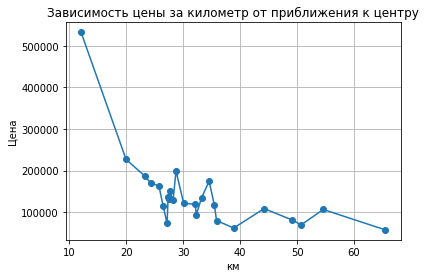

In [98]:
compare_price_and_km_to_Center = data.pivot_table(index='locality_name', values=['last_price', 'cityCenters_nearest_km'])
compare_price_and_km_to_Center['price_per_km_to_Center'] = compare_price_and_km_to_Center['last_price']/\
compare_price_and_km_to_Center['cityCenters_nearest_km']
compare_price_and_km_to_Center.dropna(inplace=True)
compare_price_and_km_to_Center.sort_values(by='cityCenters_nearest_km',ascending=False, inplace=True)
plt.plot(compare_price_and_km_to_Center['cityCenters_nearest_km'].to_list(),
         compare_price_and_km_to_Center['price_per_km_to_Center'].to_list(), 'o-')
plt.grid(True)
plt.title('Зависимость цены за километр от приближения к центру')
plt.ylabel('Цена')
plt.xlabel('км')
plt.show()

Комментарий: Как и должно, цена за километр уменьшается по мере отдаления от центра.

### Общий вывод

Этот проект потребовал во много раз больше времени, чем предыдущие. Я старался объективно оценивать всевозможные выбросы и удалять их. В итоге анализом мы подтвердили то, что цена квартиры в основном зависит от общей площади квартиры. Но кроме этого, на цену влияют также другие параметры, но не так сильно, например близость к центру. Я не стал выделять площадь кухни, жилую и т.д. поскольку они все зависят от общей площади. Также цены на первый этаж ниже, а дата продажи не влияет на цену. Таким образом, в помощью графиков и корреляции мы выявили от каких параметров больше всего зависит цена на объект недвижимости. 

Касательно пропусков, большинство это скорее всего просто человеческий фактор, а именно либо какие-то данные просто не заполнялись, например **kitchen_area** для студий или расстояние до центра, которые человек просто решил не заполнять, как в случае с аэропортом, парком или прудом, но в случае парка или пруда его просто может не быть в радиусе 3 км, в таком случае заполнять 0 некорректно, а средним нельзя, может там парка и вовсе нет, тут помогал параметр количество ближайших парков, но он не сильно улучшил положение, около 5 тысяч остались без столбцов связанных с прудами и парками, и столько же со знаниями расстояния до центра города или аэропорта. Стоит указывать географические координаты при размешении объявления, тогда подсчет параметров удаленности различных объектов будет существенно проще и не содержать пропусков. Кроме того, не будет путаницы с населенным пунктами. Так как я житель Петербурга, я примерно понимаю отдаленность некоторых населенных пунктов, поэтому расстояние до центра и аэропорта также заполнять не стал, уж сильно среднее расстояние искажает реальность, а заполнять в ручную не целесообразно. Наверное единственными данными, которые вряд ли могли быть неправильными по человеческому фактору - это **ceiling_height**, там уж очень странные данные, вряд ли кто-то просто ошибся запятой, ведь 10 м, которые из-за ошибки в порядке превращаются в 1 м, который также нереален. Скорее всего при переносе данных возникла техническая ошибка.
Фактом могу зафиксировать то, что на цену недвижимости больше всего несомненно влияет площадь, но немало важно географическое положение, здесь оно рассматривается только с точки зрения близости к центру города, аэропорту, парку и пруду. Но из всех трех, центр города лучше всего отражается влияние на географическое положение, цена за км увеличивается до 5 раз. За одну и ту же квартиру по метражу, но отличным по близости к центру, придется заплатить в разы разные суммы. 
